In [ ]:
import tensorflow as tf

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-06-23 18:01:33--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  9.88MB/s    in 9.0s    

2021-06-23 18:01:43 (7.44 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [ ]:
import zipfile

In [ ]:
!cp /content/messy_vs_clean_room.zip /content/sample_data/

In [ ]:
zip_ref = zipfile.ZipFile('/content/sample_data/messy_vs_clean_room.zip','r')
zip_ref.extractall('/tmp')

In [ ]:
zip_ref.close()

In [ ]:
import os

#base_dir = 'tmp/images'
#train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'val')

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

'/tmp/images/train'

In [ ]:
#membuat direktori untuk clean dan messy pada train
train_messy_dir = os.path.join(train_dir,'messy')
train_clean_dir = os.path.join(train_dir,'clean')

#membuat direktori untuk clean dan messy pada validation
validation_messy_dir = os.path.join(validation_dir,'messy')
validation_clean_dir = os.path.join(validation_dir,'clean')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=4, class_mode = 'binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 7s - loss: 0.8715 - accuracy: 0.5000 - val_loss: 0.6885 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 6s - loss: 0.6852 - accuracy: 0.6000 - val_loss: 0.6363 - val_accuracy: 0.7500
Epoch 3/20
25/25 - 6s - loss: 0.5902 - accuracy: 0.6900 - val_loss: 0.5059 - val_accuracy: 0.7500
Epoch 4/20
25/25 - 6s - loss: 0.6288 - accuracy: 0.7400 - val_loss: 0.4968 - val_accuracy: 0.7500
Epoch 5/20
25/25 - 6s - loss: 0.5603 - accuracy: 0.7100 - val_loss: 0.5085 - val_accuracy: 0.8000
Epoch 6/20
25/25 - 6s - loss: 0.5858 - accuracy: 0.6900 - val_loss: 0.5396 - val_accuracy: 0.7500
Epoch 7/20
25/25 - 6s - loss: 0.6350 - accuracy: 0.7200 - val_loss: 0.4885 - val_accuracy: 0.8000
Epoch 8/20
25/25 - 6s - loss: 0.4828 - accuracy: 0.8000 - val_loss: 0.4750 - val_accuracy: 0.8000
Epoch 9/20
25/25 - 6s - loss: 0.5240 - accuracy: 0.7900 - val_loss: 0.4369 - val_accuracy: 0.8000
Epoch 10/20
25/25 - 6s - loss: 0.5359 - accuracy: 0.7800 - val_loss: 0.3686 - val_accuracy: 0.9000
Epoch 11/20
25/25 -

Saving bedroom.jpg to bedroom.jpg
bedroom.jpg
messy


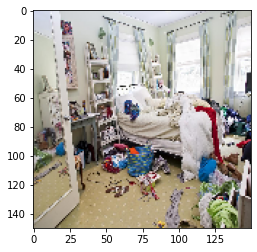

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')